EEE598 HW2 9B

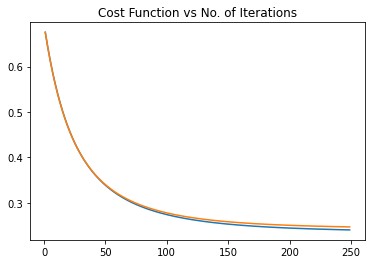

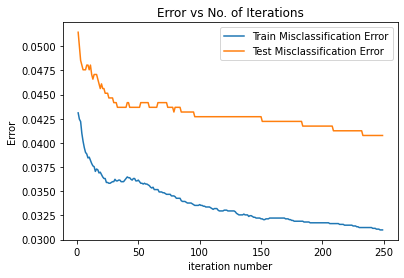

In [25]:
# Problem 9 

import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.datasets import mnist
import math


## Pre-process training and test datasets
class_1, class_2 = 2,7 	
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten images: each image is reshaped to an 1x784 numpy array
x_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
x_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

# Keep only 'class_1' and 'class_2' digits from the dataset
X_train = np.vstack( (x_train[y_train==class_1], x_train[y_train==class_2]) )
Y_train = np.hstack( (y_train[y_train==class_1], y_train[y_train==class_2]) )
X_test = np.vstack( (x_test[y_test==class_1], x_test[y_test==class_2]) )
Y_test = np.hstack( (y_test[y_test==class_1], y_test[y_test==class_2]) )


X_train = X_train/255.0
X_test = X_test/255.0


lambd = 0.1
n = X_train.shape[0]


#################### CLASSIFY 2 AS -1 AND 7 AS 1 FOR TRAIN AND TEST ##############

labels_train = np.zeros(np.size(Y_train))
for i in range(len(Y_train)):
  if Y_train[i] == 2:
    labels_train[i] = -1
  else:
    labels_train[i] = 1


labels_test = np.zeros(np.size(Y_test))
for i in range(len(Y_test)):
  if Y_test[i] == 2:
    labels_test[i] = -1
  else:
    labels_test[i] = 1


# Binary (-1,1) encoding of 'class_1' as -1 and 'class_2' as 1
Y_train[Y_train==class_1] = -1.0
Y_train[Y_train==class_2] = 1.0
Y_test[Y_test==class_1] = -1.0
Y_test[Y_test==class_2] = 1.0

#################### DONE WITH CLASSIFICATION ##################################

#################### DEFINE SIGMOID AND COST FUNCTIONS ############################
def sigmoid(y):
  return 1 / (1 + np.exp(-y))


def cos_func(y,x,w,b):
  # cost_func = 1/n * np.sum((np.log(1+np.exp(-np.multiply(y,b+np.dot(x,w)))))) + lambd* np.sum(pow(w,2))
  n = y.shape[0]
  cost_func = 1/n * np.sum(np.log(1+np.exp(np.multiply(-y,b+np.dot(w.T,x.T))))) + lambd* np.sum(pow(w,2))
  # cost_func = np.log(1+np.exp(- y*(b+ x*w))) + lambd* pow(w,2) * (1/n)
  return cost_func

################ BATCH GRADIENT DESCENT FUNCTION ###########################################3

def batch_GD(x_tr,y_tr,x_te,y_te):

  d = x_tr.shape[1]
  w = np.zeros(x_tr.shape[1])
  b = np.zeros(x_tr.shape[0])
  b2 = np.zeros(x_te.shape[0])
  n = x_tr.shape[0]
  n2 = x_te.shape[0]
  J_train = []
  J_test = []
  tr_m = []
  te_m = []
  iter = []
  converge = 0
  it = 0
  eta = 0.01
  while converge != x_tr.shape[1]:
    
    w_old = w

    #Gradient for w
    frst = 0
    mu = 1/(1+np.exp(np.multiply(-y_tr,(b + np.dot(x_tr,w)))))
    frst = np.sum(x_tr * (np.multiply((mu - 1) , y_tr))[:,np.newaxis],axis=0)
    g_w = frst/n + 2*lambd*w
    w = w - eta * g_w
   

    #Gradient for b train
    mu = 1/(1+np.exp(-np.multiply(y_tr,(b + np.dot(x_tr,w)))))
    o = np.dot((mu - 1) , (y_tr))
    g_b = (1/n) * o
    b = b - eta * g_b
  

    #Gradient for b_test
    mu2 = 1/(1+np.exp(-np.multiply(y_te,(b2 + np.dot(x_te,w)))))
    i = np.dot((mu2 - 1) , (y_te))
    g_b2 = (1/n2) * i
    b2r = b2 - eta * g_b2
    b2 = b2r[:]

    # Calculate and update cost function for train and test
    J_train.append(cos_func(y_tr,x_tr,w,b))
    J_test.append(cos_func(y_te,x_te,w,b2))
    
    it = it + 1
    iter.append(it)
    #Checking for convergence
    converge = 0
    for i in range(len(w)):
      if np.absolute(w_old[i] - w[i]) <= 0.0001:
        converge = converge + 1

    # Misclassification of train
    y_cap = b + np.dot(x_tr,w)
    qwerty = 0
    qw = 0

    for i in range(n):
      if y_cap[i] * y_tr[i] < 0:
        qwerty = qwerty + 1
    tr_m.append(qwerty/n)

    #Misclassification of test
    y_cap_te = b2 + np.dot(x_te,w)

    for j in range(n2):
      if y_cap_te[j] * y_te[j] < 0:
        qw = qw + 1
    te_m.append(qw/x_te.shape[0])

  return J_train,J_test,iter,tr_m,te_m

###################### DONE WITH BATCH GRADIENT FUNCTION #########################################

############################### CALLING GRADIENT DESCENT FUNCTION AND PLOTTING ##########################

J_tr,J_te,ite,misclas_tr,misclas_te = batch_GD(X_train,labels_train,X_test,labels_test)

plt.figure(1)
plt.plot(ite,J_tr, label = 'Train Error')
plt.plot(ite,J_te, label = 'Test Error')
plt.title("Cost Function vs No. of Iterations")

plt.figure(2)
plt.plot(ite,misclas_tr, label = 'Train Misclassification Error')
plt.plot(ite,misclas_te, label = 'Test Misclassification Error')
plt.xlabel("iteration number")
plt.ylabel("Error")
plt.title("Error vs No. of Iterations")

plt.legend()
plt.show()



EEE598 HW2 9C

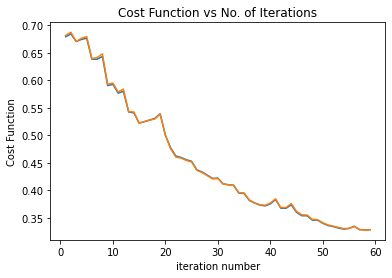

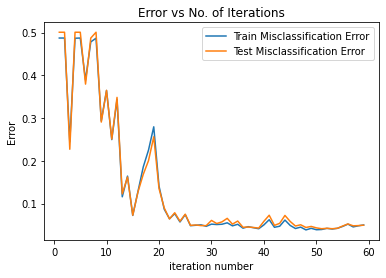

In [26]:

import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.datasets import mnist
import math


## Pre-process training and test datasets
class_1, class_2 = 2,7 	
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten images: each image is reshaped to an 1x784 numpy array
x_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
x_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

# Keep only 'class_1' and 'class_2' digits from the dataset
X_train = np.vstack( (x_train[y_train==class_1], x_train[y_train==class_2]) )
Y_train = np.hstack( (y_train[y_train==class_1], y_train[y_train==class_2]) )
X_test = np.vstack( (x_test[y_test==class_1], x_test[y_test==class_2]) )
Y_test = np.hstack( (y_test[y_test==class_1], y_test[y_test==class_2]) )


X_train = X_train/255.0
X_test = X_test/255.0


lambd = 0.1
n = X_train.shape[0]


#################### CLASSIFY 2 AS -1 AND 7 AS 1 FOR TRAIN AND TEST ##############

labels_train = np.zeros(np.size(Y_train))
for i in range(len(Y_train)):
  if Y_train[i] == 2:
    labels_train[i] = -1
  else:
    labels_train[i] = 1


labels_test = np.zeros(np.size(Y_test))
for i in range(len(Y_test)):
  if Y_test[i] == 2:
    labels_test[i] = -1
  else:
    labels_test[i] = 1


# Binary (-1,1) encoding of 'class_1' as -1 and 'class_2' as 1
Y_train[Y_train==class_1] = -1.0
Y_train[Y_train==class_2] = 1.0
Y_test[Y_test==class_1] = -1.0
Y_test[Y_test==class_2] = 1.0

#################### DONE WITH CLASSIFICATION ##################################

#################### DEFINE SIGMOID AND COST FUNCTIONS ############################
def sigmoid(y):
  return 1 / (1 + np.exp(-y))


def cos_func(y,x,w,b):
  # cost_func = 1/n * np.sum((np.log(1+np.exp(-np.multiply(y,b+np.dot(x,w)))))) + lambd* np.sum(pow(w,2))
  n = y.shape[0]
  cost_func = 1/n * np.sum(np.log(1+np.exp(np.multiply(-y,b+np.dot(w.T,x.T))))) + lambd* np.sum(pow(w,2))
  # cost_func = np.log(1+np.exp(- y*(b+ x*w))) + lambd* pow(w,2) * (1/n)
  return cost_func

  ###################### STOCHASTIC GRADIENT FUNCTIION ####################################


def stochastic_GD(x_tr,y_tr,x_te,y_te,batch):

  d = x_tr.shape[1]
  w = np.zeros(x_tr.shape[1])
  b = np.zeros(x_tr.shape[0])
  b2 = np.zeros(x_te.shape[0])
  n = x_tr.shape[0]
  J_train = []
  J_test = []
  tr_m = []
  te_m = []
  iter = []
  converge = 0
  it = 0
  n2 = x_te.shape[0]
  eta = 0.01
  while converge != x_tr.shape[1]:
    rand_ind = np.random.randint(x_tr.shape[0])
    rand_ind_t = np.random.randint(x_te.shape[0])
    
    
    w_old = w
    #Gradient for w
    frst = 0
    
    mu = sigmoid(np.multiply(y_tr[rand_ind],b[rand_ind] + np.dot(x_tr[rand_ind],w)))
    for i in range(batch):
      frst = frst + (mu - 1) * (y_tr[rand_ind]*np.transpose(x_tr[rand_ind]))
    g_w = frst + 2*lambd*w
    w = w - eta * g_w

    #Gradient for b train
    o = 0
    
    mu = sigmoid(np.multiply(y_tr[rand_ind],b[rand_ind] + np.dot(x_tr[rand_ind],w)))
    for i in range(batch):
      o = o + (mu - 1) * (y_tr[rand_ind])
    g_b = o
    b = b - eta * g_b

    #Gradient for b_test
    i = 0
    
   
    mu2 = sigmoid(np.multiply(y_te[rand_ind_t],b2[rand_ind_t] + np.dot(x_te[rand_ind_t],w)))
    for i in range(batch):
      i = i + (mu2 - 1) * (y_te[rand_ind_t])
    g_b2 =  i
    b2 = b2 - eta * g_b2

    # Calculate and update cost function for train and test
    J_train.append(cos_func(y_tr,x_tr,w,b))
    J_test.append(cos_func(y_te,x_te,w,b2))
    it = it + 1
    iter.append(it)

    #Checking for convergence
    converge = 0
    for i in range(len(w)):
      if np.absolute(w_old[i] - w[i]) <= 0.001:
        converge = converge + 1

    
    y_cap = b + np.dot(x_tr,w)
    qwerty = 0
    qw = 0

    for i in range(n):
      if y_cap[i] * y_tr[i] < 0:
        qwerty = qwerty + 1
    tr_m.append(qwerty/n)


    y_cap_te = b2 + np.dot(x_te,w)

    for j in range(x_te.shape[0]):
      if y_cap_te[j] * y_te[j] < 0:
        qw = qw + 1
    te_m.append(qw/x_te.shape[0])


  return J_train,J_test,iter,tr_m,te_m

#################### DONE wITH STOCHASTIC GRADIENT FUNCTION #######################

############################### CALLING STOCHASTIC GRADIENT DESCENT FUNCTION AND PLOTTING ##########################
J_tr,J_te,ite,misclas_tr,misclas_te = stochastic_GD(X_train,labels_train,X_test,labels_test,1)
plt.figure(1)
plt.plot(ite,J_tr, label = 'Train Error')
plt.plot(ite,J_te, label = 'Test Error')
plt.xlabel("iteration number")
plt.ylabel("Cost Function")
plt.title("Cost Function vs No. of Iterations")

plt.figure(2)
plt.plot(ite,misclas_tr, label = 'Train Misclassification Error')
plt.plot(ite,misclas_te, label = 'Test Misclassification Error')
plt.xlabel("iteration number")
plt.ylabel("Error")
plt.title("Error vs No. of Iterations")


plt.legend()
plt.show()

############################### DONE WITH STOCHASTIC GRADIENT FUNCTION AND PLOTTING ################################


EEE598 HW 9D

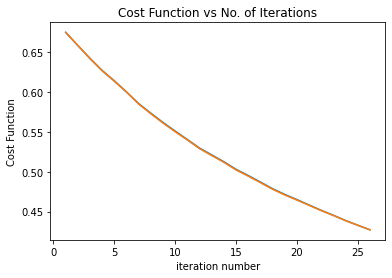

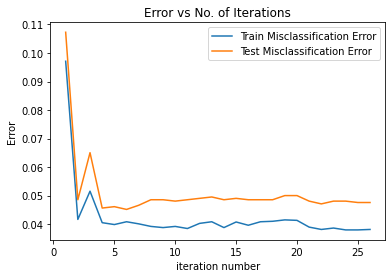

In [27]:

import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.datasets import mnist
import math


## Pre-process training and test datasets
class_1, class_2 = 2,7 	
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten images: each image is reshaped to an 1x784 numpy array
x_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
x_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

# Keep only 'class_1' and 'class_2' digits from the dataset
X_train = np.vstack( (x_train[y_train==class_1], x_train[y_train==class_2]) )
Y_train = np.hstack( (y_train[y_train==class_1], y_train[y_train==class_2]) )
X_test = np.vstack( (x_test[y_test==class_1], x_test[y_test==class_2]) )
Y_test = np.hstack( (y_test[y_test==class_1], y_test[y_test==class_2]) )


X_train = X_train/255.0
X_test = X_test/255.0


lambd = 0.1
n = X_train.shape[0]


#################### CLASSIFY 2 AS -1 AND 7 AS 1 FOR TRAIN AND TEST ##############

labels_train = np.zeros(np.size(Y_train))
for i in range(len(Y_train)):
  if Y_train[i] == 2:
    labels_train[i] = -1
  else:
    labels_train[i] = 1


labels_test = np.zeros(np.size(Y_test))
for i in range(len(Y_test)):
  if Y_test[i] == 2:
    labels_test[i] = -1
  else:
    labels_test[i] = 1


# Binary (-1,1) encoding of 'class_1' as -1 and 'class_2' as 1
Y_train[Y_train==class_1] = -1.0
Y_train[Y_train==class_2] = 1.0
Y_test[Y_test==class_1] = -1.0
Y_test[Y_test==class_2] = 1.0

#################### DONE WITH CLASSIFICATION ##################################




#################### DEFINE SIGMOID AND COST FUNCTIONS ############################
def sigmoid(y):
  return 1 / (1 + np.exp(-y))


def cos_func(y,x,w,b):
  # cost_func = 1/n * np.sum((np.log(1+np.exp(-np.multiply(y,b+np.dot(x,w)))))) + lambd* np.sum(pow(w,2))
  n = y.shape[0]
  cost_func = 1/n * np.sum(np.log(1+np.exp(np.multiply(-y,b+np.dot(w.T,x.T))))) + lambd* np.sum(pow(w,2))
  # cost_func = np.log(1+np.exp(- y*(b+ x*w))) + lambd* pow(w,2) * (1/n)
  return cost_func

###################### MINI BATCH GRADIENT FUNCTIION ####################################


def Mini_batch_GD(x_tr,y_tr,x_te,y_te,batch):

  d = x_tr.shape[1]
  w = np.zeros(x_tr.shape[1])
  b = np.zeros(x_tr.shape[0])
  b2 = np.zeros(x_te.shape[0])
  n = x_tr.shape[0]
  J_train = []
  J_test = []
  tr_m = []
  te_m = []
  iter = []
  converge = 0
  it = 0
  eta = 0.01
  while converge != x_tr.shape[1]:
    rand_ind = np.random.randint(x_tr.shape[0],size=100)
    rand_ind_t = np.random.randint(x_te.shape[0],size = 100)
    x_100_tr = x_tr[rand_ind]
    y_100_tr = y_tr[rand_ind]
    x_100_te = x_te[rand_ind_t]
    y_100_te = y_te[rand_ind_t]
   

    w_old = w
    #Gradient for w
    frst = 0
    mu = sigmoid(np.multiply(y_100_tr,b[rand_ind] + np.dot(x_100_tr,w)))
    for i in range(batch):
      frst = frst + (mu[i] - 1) * (y_100_tr[i]*np.transpose(x_100_tr[i]))
    g_w = frst/100 + 2*lambd*w
    w = w - eta * g_w

    #Gradient for b train
    o = 0
    mu = sigmoid(np.multiply(y_100_tr,b[rand_ind] + np.dot(x_100_tr,w)))
    for i in range(batch):
      o = o + (mu - 1) * (y_100_tr[i])
    g_b = o/100
    b[rand_ind] = b[rand_ind] - eta * g_b

    #Gradient for b_test
    i = 0
    mu2 = sigmoid(np.multiply(y_100_te,b2[rand_ind_t] + np.dot(x_100_te,w)))
    for i in range(batch):
      i = i + (mu2 - 1) * (y_100_te[i])
    g_b2 = 1/100 * i
    b2[rand_ind_t] = b2[rand_ind_t] - eta * g_b2

    J_train.append(cos_func(y_tr,x_tr,w,b))
    J_test.append(cos_func(y_te,x_te,w,b2))
    it = it + 1
    iter.append(it)

    converge = 0
    for i in range(len(w)):
      if np.absolute(w_old[i] - w[i]) <= 0.001:
        converge = converge + 1

    
    y_cap = b + np.dot(x_tr,w)
    qwerty = 0
    qw = 0

    for i in range(n):
      if y_cap[i] * y_tr[i] < 0:
        qwerty = qwerty + 1
    tr_m.append(qwerty/n)


    y_cap_te = b2 + np.dot(x_te,w)

    for j in range(x_te.shape[0]):
      if y_cap_te[j] * y_te[j] < 0:
        qw = qw + 1
    te_m.append(qw/x_te.shape[0])


  return J_train,J_test,iter,tr_m,te_m

#################### DONE wITH Mini batch GRADIENT FUNCTION #######################




############################### CALLING MINI GRADIENT DESCENT FUNCTION AND PLOTTING ##########################
J_tr,J_te,ite,misclas_tr,misclas_te = Mini_batch_GD(X_train,labels_train,X_test,labels_test,100)
plt.figure(1)
plt.plot(ite,J_tr, label = 'Train Error')
plt.plot(ite,J_te, label = 'Test Error')
plt.xlabel("iteration number")
plt.ylabel("Cost Function")
plt.title("Cost Function vs No. of Iterations")

plt.figure(2)
plt.plot(ite,misclas_tr, label = 'Train Misclassification Error')
plt.plot(ite,misclas_te, label = 'Test Misclassification Error')
plt.xlabel("iteration number")
plt.ylabel("Error")
plt.title("Error vs No. of Iterations")

plt.legend()
plt.show()
############################### DONE WITH MINI BATCH GRADIENT FUNCTION AND PLOTTING ################################